In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy import stats

In [ ]:
file_path = '/home/unix/Downloads/iris.csv'  # Provide the local path to your dataset
data = pd.read_csv(file_path)


In [ ]:
# Show first 5 rows of the dataset
print(data.head())

# Display general information about the dataset
print(data.info())

# Show summary statistics for numeric columns
print(data.describe())


   '                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
# Checking for missing values
print(data.isnull().sum())


'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
# Handle missing values
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=[object]).columns

# Impute missing numeric data with the median
imputer = SimpleImputer(strategy='median')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Impute missing categorical data with the mode
imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer.fit_transform(data[categorical_cols])


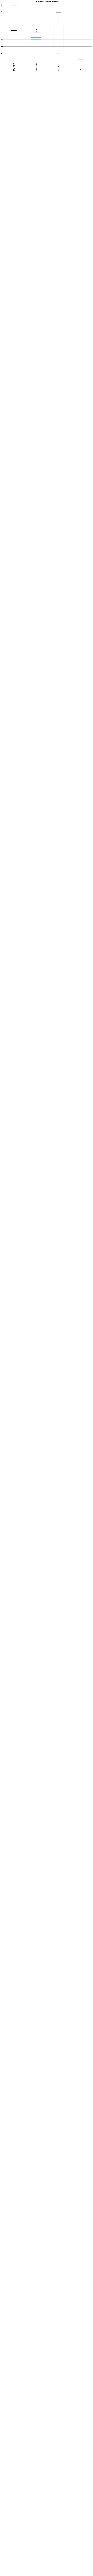

Outliers detected: 0


In [ ]:
# Visualize the numeric variables using boxplots
plt.figure(figsize=(12, 8))
data[numeric_cols].boxplot(rot=90)
plt.title('Boxplot of Numeric Variables')
plt.show()

# Z-score method to detect outliers
z_scores = np.abs(stats.zscore(data[numeric_cols]))
outliers = (z_scores > 3).all(axis=1)
print(f"Outliers detected: {outliers.sum()}")

# Remove outliers (optional)
data_clean = data[~outliers]


In [ ]:
# Log transformation to normalize the 'Fare' column
data['petal_width'] = np.log1p(data['petal_width'])


In [ ]:
# Label Encoding for categorical columns
label_encoder = LabelEncoder()

# Encoding the 'Sex' column as an example
data['sepal_width'] = label_encoder.fit_transform(data['sepal_width'])


In [ ]:
# One-Hot Encoding for 'Embarked' column
data = pd.get_dummies(data, columns=['sepal_width'], drop_first=True)


In [ ]:
# Display the first few rows of the cleaned dataset
print(data.head())

# Display summary statistics again after transformations
print(data.describe())


   '                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    